## Priority Nonpreemtive Scheduling
### by Isabel Joy Adriatico, Tricia Jonina B. Alcisto
each process is assigned a priority, and the CPU selects the process with the highest priority (usually the smallest priority number) to execute first. Once a process starts executing, it cannot be preempted until it completes.

In [7]:
import matplotlib.pyplot as plt

##### The Process class is used to define each process with attributes such as:
- pid: The process ID like A, B, C.
- arrival_time: The time when the process arrives (i.e., when it’s ready to execute).
- burst_time: The total time required by the process to execute (also called CPU burst time).
- priority: The priority value of the process (lower values have higher priority).
- completion_time, turnaround_time, waiting_time, and start_time: These are placeholders for the metrics we calculate during the scheduling process.

In [8]:
class Process:
    def __init__(self, pid, arrival_time, burst_time, priority):
        self.pid = pid
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.priority = priority 
        self.completion_time = 0
        self.turnaround_time = 0
        self.waiting_time = 0
        self.start_time = 0  

##### This class implements the priority nonpreemptive algo
- Priority: Each process is assigned a priority, and the process with the highest priority (smallest priority value) will be selected next.
- Completion Time: The process starts at the current time and finishes after its burst time.
- Waiting Time: The waiting time for each process is calculated as 𝑊𝑇= Start Time − Arrival Time
- Turnaround Time: The turnaround time is calculated as Turnaround Time = Completion Time − Arrival Time

In [9]:
def calculate_priority_non_preemptive(processes):
    # Sort the processes by arrival time
    processes.sort(key=lambda x: x.arrival_time)
    
    current_time = 0
    completed_processes = []
    
    while processes:
        ready_queue = [p for p in processes if p.arrival_time <= current_time]
        
        if not ready_queue:
            current_time = min(processes, key=lambda x: x.arrival_time).arrival_time
            ready_queue = [p for p in processes if p.arrival_time <= current_time]
        
        highest_priority_process = min(ready_queue, key=lambda x: x.priority)
        
        highest_priority_process.start_time = current_time
        current_time = max(current_time, highest_priority_process.arrival_time) + highest_priority_process.burst_time
        
        highest_priority_process.completion_time = current_time
        highest_priority_process.turnaround_time = highest_priority_process.completion_time - highest_priority_process.arrival_time
        
        highest_priority_process.waiting_time = highest_priority_process.start_time - highest_priority_process.arrival_time
        
        completed_processes.append(highest_priority_process)
        processes.remove(highest_priority_process)
    
    return completed_processes

##### displays a Gantt chart showing the execution timeline of the processes and process summary
- Input: The user provides the processes’ arrival times, burst times, and priorities.
- Scheduling: The processes are sorted by their arrival times, and each process is scheduled based on its priority (lowest priority number first).
- Output: The program outputs a Gantt chart, a detailed process summary, and the average waiting time.

Enter the number of processes:  5
Enter arrival time for process A:  0
Enter burst time for process A:  8
Enter priority for process A (smaller value means higher priority):  2
Enter arrival time for process B:  3
Enter burst time for process B:  4
Enter priority for process B (smaller value means higher priority):  1
Enter arrival time for process C:  4
Enter burst time for process C:  5
Enter priority for process C (smaller value means higher priority):  5
Enter arrival time for process D:  6
Enter burst time for process D:  3
Enter priority for process D (smaller value means higher priority):  3
Enter arrival time for process E:  10
Enter burst time for process E:  2
Enter priority for process E (smaller value means higher priority):  4


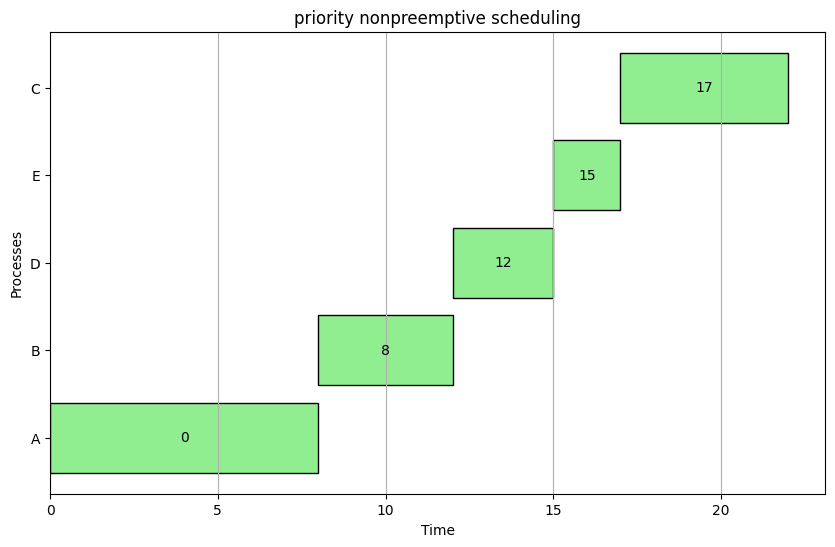


Process Summary:
Process	Arrival Time	Burst Time	Priority	Completion Time	Turnaround Time	Waiting Time
A	0		8		2		8		8		0
B	3		4		1		12		9		5
D	6		3		3		15		9		6
E	10		2		4		17		7		5
C	4		5		5		22		18		13

Average Waiting Time: 5.80 ms


In [10]:
def display_gantt_chart(processes):
    start_times = []
    process_names = []
    for process in processes:
        start_times.append(process.start_time)
        process_names.append(process.pid)
    
    plt.figure(figsize=(10, 6))
    plt.barh(process_names, [p.burst_time for p in processes], left=start_times, color='lightgreen', edgecolor='black')
    plt.xlabel("Time")
    plt.ylabel("Processes")
    plt.title("priority nonpreemptive scheduling")
    plt.grid(axis='x')
    
    for i, process in enumerate(processes):
        plt.text(start_times[i] + process.burst_time / 2, i, str(start_times[i]), ha='center', va='center', color='black')
    
    plt.show()

def print_process_summary(processes):
    print("\nProcess Summary:")
    print("Process\tArrival Time\tBurst Time\tPriority\tCompletion Time\tTurnaround Time\tWaiting Time")
    for process in processes:
        print(f"{process.pid}\t{process.arrival_time}\t\t{process.burst_time}\t\t{process.priority}\t\t{process.completion_time}\t\t{process.turnaround_time}\t\t{process.waiting_time}")

def calculate_average_waiting_time(processes):
    total_waiting_time = sum(process.waiting_time for process in processes)
    average_waiting_time = total_waiting_time / len(processes)
    return average_waiting_time

def main():
    processes = []
    n = int(input("Enter the number of processes: "))
    
    for i in range(n):
        pid = chr(65 + i)  # Process IDs as A, B, C, ...
        arrival_time = int(input(f"Enter arrival time for process {pid}: "))
        burst_time = int(input(f"Enter burst time for process {pid}: "))
        priority = int(input(f"Enter priority for process {pid} (smaller value means higher priority): "))
        processes.append(Process(pid, arrival_time, burst_time, priority))

    completed_processes = calculate_priority_non_preemptive(processes)
    display_gantt_chart(completed_processes)
    print_process_summary(completed_processes)

    avg_waiting_time = calculate_average_waiting_time(completed_processes)
    print(f"\nAverage Waiting Time: {avg_waiting_time:.2f} ms")

if __name__ == "__main__":
    main()